In [4]:
import random
import matplotlib.pyplot as plt
lamda = 2
N = 10000



(array([1.79329411, 1.74497738, 1.49410204, 1.37888522, 1.20420164,
        1.10570984, 1.05553477, 0.95704297, 0.78050107, 0.71731765,
        0.6374092 , 0.58723414, 0.51104236, 0.46272563, 0.41069223,
        0.4144089 , 0.35680049, 0.2899004 , 0.27875038, 0.24901701,
        0.22114197, 0.22857531, 0.18397525, 0.15795855, 0.13008351,
        0.12265017, 0.10220847, 0.09105846, 0.07433343, 0.10220847,
        0.08548345, 0.08176678, 0.04460006, 0.04831673, 0.04831673,
        0.04088339, 0.05017507, 0.02787504, 0.02973337, 0.02787504,
        0.03716672, 0.02044169, 0.02044169, 0.01115002, 0.02230003,
        0.01672502, 0.01672502, 0.01115002, 0.01115002, 0.01115002,
        0.00929168, 0.00557501, 0.00185834, 0.00371667, 0.00557501,
        0.00557501, 0.00557501, 0.00371667, 0.00557501, 0.00371667,
        0.        , 0.00557501, 0.        , 0.00371667, 0.        ,
        0.00185834, 0.00185834, 0.00185834, 0.00185834, 0.        ,
        0.00185834, 0.        , 0.00185834, 0.00

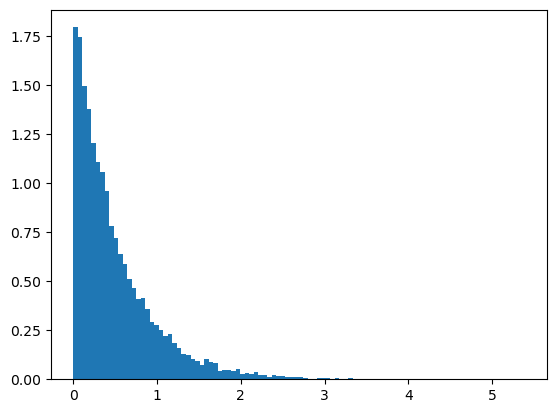

In [5]:
res = []
for i in range(N):
    x = random.expovariate(lamda)
    res.append(x)
plt.hist(res, bins=100, density=True)

Simulating the exponential distribution

[1.04342699 0.01637146 0.92106624 ... 0.50730522 0.06271941 1.96320514]


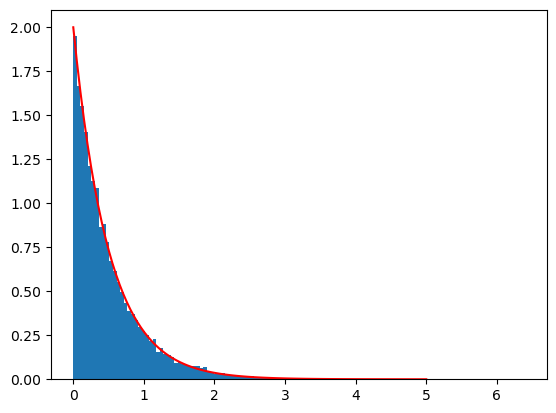

In [25]:
import numpy as np
import numpy.random as npr
def SimExpo(lam, N):
    U=npr.random(N)
    Y=-1/lam*np.log(1-U)

    return Y
lam=2 
N=10000
Y=SimExpo(lam, N)
print(Y)
plt.hist(Y, bins='auto', density=True)

x=np.linspace(0, 5, 100)
plt.plot(x, lam*np.exp(-lam*x), 'r')


Using the Accept / Reject Method to simulate random variables form a triangular pdf

/var/folders/ht/6gcgdv491wj45vysttm86yq80000gn/T/ipykernel_61658/1502767681.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[j]=X


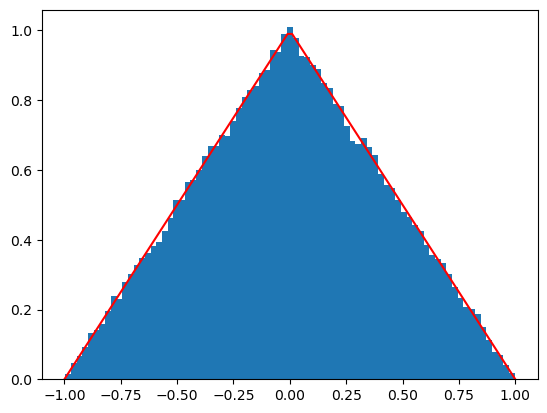

In [12]:
def rho(x):
    if x<0:
        y=1+x
    else:
        y=1-x

    return y

N=100000
j=0
Z=np.zeros(N)

while j<N:
    X= 2*npr.random(1)-1
    Y=npr.random(1)
    if rho(X)>Y:
        Z[j]=X
        j=j+1

plt.hist(Z, bins='auto', density=True)

vrho = np.vectorize(rho)

x=np.linspace(-1, 1, 100)
plt.plot(x, vrho(x), 'r')

Using Box-Muller to simulate random normal variables in the case where the covariance matrix is diagonal and the random variables are independant

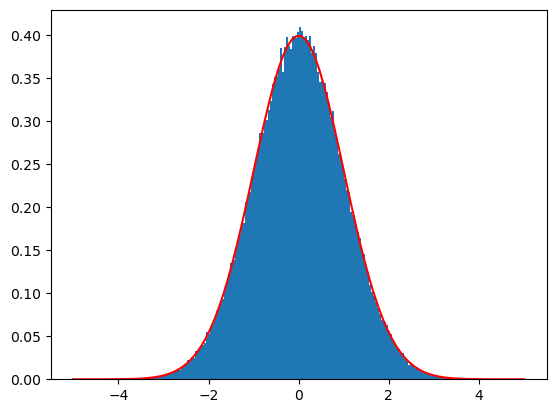

In [14]:
U=npr.random(N)
V=npr.random(N)

X=np.sqrt(-2* np.log(U))*np.cos(2*np.pi*V)
Y=np.sqrt(-2* np.log(U))*np.sin(2*np.pi*V)

Z=np.concatenate((X, Y))
plt.hist(Z, bins='auto', density=True)

x=np.linspace(-5, 5, 100)

plt.plot(x, 1/np.sqrt(2*np.pi)*np.exp(-x**2/2), 'r')

Cholesky method for simulating normal RVs to allow for correlation

[[1.        0.5      ]
 [0.        0.8660254]]


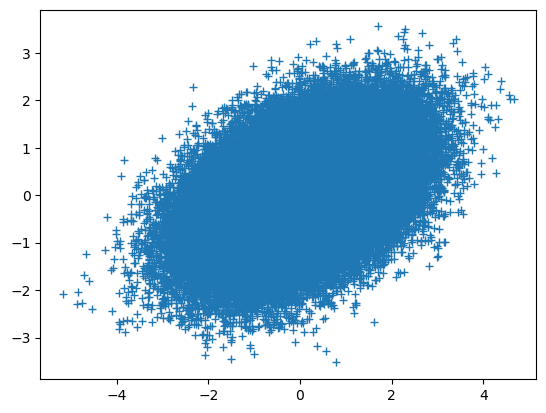

In [24]:
# Cholesky method for generating correlated normal random variables
from scipy.linalg import cholesky

rho=0.5

N=100000
G=npr.normal(0, 1, (2,N))

Gamma = np.array([[1, rho], [rho, 1]])

A=cholesky(Gamma)
print(A)

X=np.dot(A, G)

plt.plot(X[0,:], X[1,:], '+')